## Import packages and set directory and load data



In [1]:
import pandas as pd
import os # use this to access your environment variables
import numpy as np
import statsmodels.api as sm

In [2]:
# For matplotlib
import matplotlib.pyplot as plt

# For seaborn
import seaborn as sns

In [3]:
os.chdir('C:/Users/Laven/Documents/Data_Analysis/Capstone_Project')


In [4]:
geohash_df = pd.read_csv('geohash_df_utf8.csv')

In [5]:
geohash_df_no_bikes = pd.read_csv('geohash_df_no_bikes_utf8.csv')


## Prepare Data For All Transit And Establishments

In [6]:
geohash_df

,Geohash,Type,Address,Name
0,f25dy,Citybike,NaN,Métro Champ-de-Mars (Viger / Sanguinet)
1,f25dv,Citybike,NaN,Clark / Ontario
2,f25dy,Citybike,NaN,de la Porte de Québec / St-André
3,f25dy,Citybike,NaN,St-Denis / de Maisonneuve
4,f25dv,Citybike,NaN,Métro Sherbrooke (de Rigaud / Berri)
...,...,...,...,...
3510,f25fc,Bar/Restaurant,"4200 Ch. de la Savane, Saint-Hubert, QC J3Y 9G5",Le Barrage - Brasseurs
3511,f25df,Bar/Restaurant,"3500 Boulevard Cote Vertu Ouest, Saint-Laurent...",Firegrill Ville St-Laurent
3512,f25dz,Bar/Restaurant,"3320 Taschereau Blvd, Greenfield Park, Quebec ...",Wild Wing Brasserie Sportive Greenfield Park
3513,f25ds,Bar/Restaurant,"5930 Sherbrooke St W Unite 102, Montréal, Que...",Entre-Deux


In [10]:
geohash_df_no_bikes



,Geohash,Type,Address,Name
0,f25dv,Subway,"Montreal, Quebec H2X 1J5, Canada",Saint Laurent
1,f25dv,Subway,"Montreal, Quebec H3A 1T1, Canada",Peel
2,f25dv,Subway,"470 Mont-Royal Ave E, Montreal, Quebec H2J 1W4...",Mont-Royal
3,f25dv,Subway,"Jeanne-Mance St, Montreal, Quebec, Canada",Place-des-Arts
4,f25dy,Subway,"Montreal, QC H2Z 1K4, Canada",Place-d'Armes
...,...,...,...,...
3331,f25fc,Bar/Restaurant,"4200 Ch. de la Savane, Saint-Hubert, QC J3Y 9G5",Le Barrage - Brasseurs
3332,f25df,Bar/Restaurant,"3500 Boulevard Cote Vertu Ouest, Saint-Laurent...",Firegrill Ville St-Laurent
3333,f25dz,Bar/Restaurant,"3320 Taschereau Blvd, Greenfield Park, Quebec ...",Wild Wing Brasserie Sportive Greenfield Park
3334,f25ds,Bar/Restaurant,"5930 Sherbrooke St W Unite 102, Montréal, Que...",Entre-Deux


In [80]:
# Prepare the data
transit_types = ['Citybike', 'Subway', 'Light Rail']
establishment_types = ['Bar', 'Restaurant', 'Bar/Restaurant']


In [81]:
establishment_types_Bars = ['Bar', 'Bar/Restaurant']

In [82]:
establishment_types_Restaurants = ['Restaurant', 'Bar/Restaurant']

In [12]:
# Count occurrences by Geohash
transit_counts = geohash_df[geohash_df['Type'].isin(transit_types)].groupby('Geohash').size()
establishment_counts = geohash_df[geohash_df['Type'].isin(establishment_types)].groupby('Geohash').size()


In [13]:
# Merge the two Series into a DataFrame for plotting
plot_data_scatterplot_all_transit_b_r = pd.DataFrame({
    'Transit Count': transit_counts,
    'Establishment Count': establishment_counts
}).fillna(0)  # Fill NaN with 0 where there is no count

In [14]:
plot_data_scatterplot_all_transit_b_r

,Transit Count,Establishment Count
Geohash,,
f256x,0.0,6.0
f256y,0.0,1.0
f256z,0.0,1.0
f257n,0.0,1.0
f257p,0.0,1.0
f25d2,0.0,1.0
f25d4,0.0,1.0
f25d7,0.0,36.0
f25d8,0.0,10.0


In [15]:
bars_counts = geohash_df[geohash_df['Type'].isin(establishment_types_Bars)].groupby('Geohash').size()

In [40]:
bars_counts

Geohash
f256x      4
f256y      1
f256z      1
f257n      1
f257p      1
f25d2      1
f25d4      1
f25d7      3
f25d8      5
f25d9      8
f25db      5
f25dd      4
f25de      1
f25df      4
f25dg      4
f25dk      8
f25dn      1
f25dp      1
f25dr      1
f25ds     14
f25dt     33
f25du     11
f25dv    144
f25dw      3
f25dy     66
f25dz      3
f25e0      1
f25e1     12
f25e2      2
f25e3      1
f25e4      7
f25e5     10
f25e6      4
f25e7      1
f25eh     33
f25ej     56
f25ek      3
f25em      9
f25en     19
f25ep      2
f25eq      7
f25er      3
f25f8     18
f25f9      1
f25fb      3
f25fc      2
dtype: int64

In [16]:
# Merge the two Series into a DataFrame for plotting
plot_data_scatterplot_all_transit_b = pd.DataFrame({
    'Transit Count': transit_counts,
    'Bar Count': bars_counts
}).fillna(0)  # Fill NaN with 0 where there is no count

In [17]:
plot_data_scatterplot_all_transit_b



,Transit Count,Bar Count
Geohash,,
f256x,0.0,4.0
f256y,0.0,1.0
f256z,0.0,1.0
f257n,0.0,1.0
f257p,0.0,1.0
f25d2,0.0,1.0
f25d4,0.0,1.0
f25d7,0.0,3.0
f25d8,0.0,5.0


In [18]:
restaurant_counts = geohash_df[geohash_df['Type'].isin(establishment_types_Restaurants)].groupby('Geohash').size()

In [19]:
# Merge the two Series into a DataFrame for plotting
plot_data_scatterplot_all_transit_r = pd.DataFrame({
    'Transit Count': transit_counts,
    'Restaurants Count': restaurant_counts
}).fillna(0)  # Fill NaN with 0 where there is no count

In [20]:
plot_data_scatterplot_all_transit_r

,Transit Count,Restaurants Count
Geohash,,
f256x,0.0,2.0
f25d7,0.0,33.0
f25d8,0.0,5.0
f25d9,2.0,38.0
f25db,1.0,56.0
f25dd,0.0,23.0
f25de,0.0,26.0
f25df,1.0,62.0
f25dg,6.0,131.0


## Making Scatterplots For Transit And Establishments

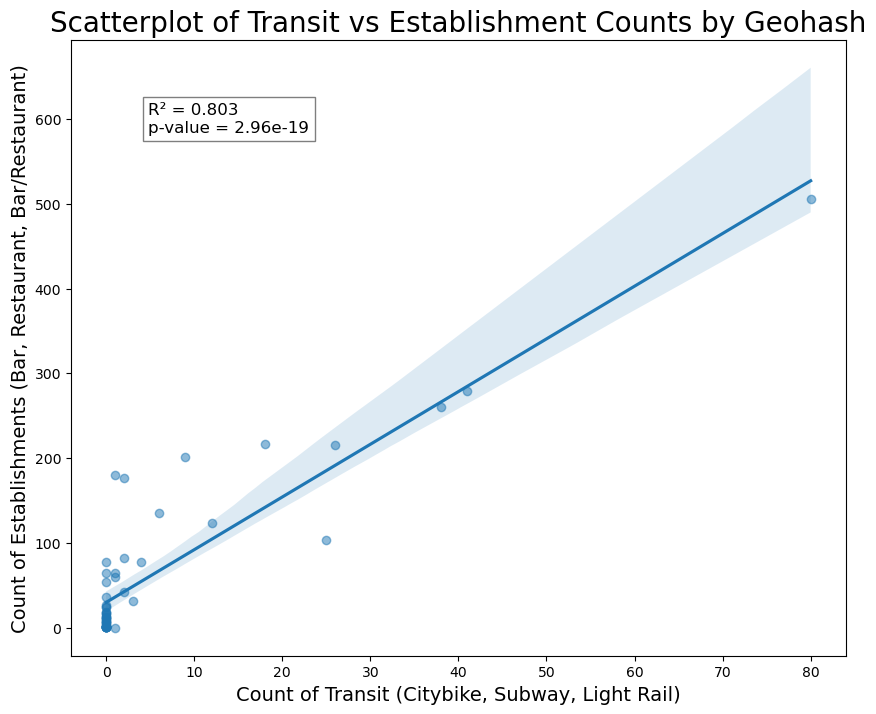

In [160]:
# Generate the scatterplot
plt.figure(figsize=(10, 8))
sns.regplot(x='Transit Count', y='Establishment Count', data=plot_data_scatterplot_all_transit_b_r, scatter_kws={'alpha':0.5})

# Enhance the plot
plt.title('Scatterplot of Transit vs Establishment Counts by Geohash', fontsize=20)
plt.xlabel('Count of Transit (Citybike, Subway, Light Rail)', fontsize=14)
plt.ylabel('Count of Establishments (Bar, Restaurant, Bar/Restaurant)', fontsize=14)

# Fit a linear regression model to get R-squared and p-value
X = plot_data_scatterplot_all_transit_b_r['Transit Count']
Y = plot_data_scatterplot_all_transit_b_r['Establishment Count']
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()

# Get the R-squared and p-value
rsquared = model.rsquared
pvalue = model.f_pvalue

# Annotate the plot with the R-squared and p-value
plt.text(0.10, 0.85, f'R² = {rsquared:.3f}\np-value = {pvalue:.3g}', 
         fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.5),
         transform=plt.gca().transAxes)

plt.savefig('Scatterplot of Transit vs Establishment Counts by Geohash_prec5.png', dpi=300)
plt.savefig('Scatterplot of Transit vs Establishment Counts by Geohash_prec5.jpg', dpi=300)

# Show the plot
plt.show()

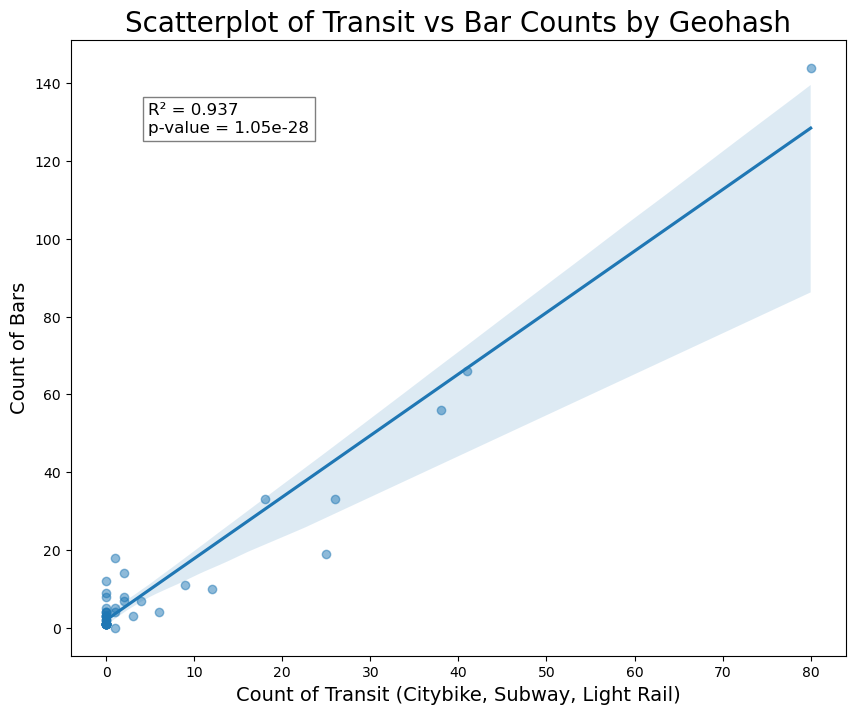

In [161]:
# Generate the scatterplot
plt.figure(figsize=(10, 8))
sns.regplot(x='Transit Count', y='Bar Count', data=plot_data_scatterplot_all_transit_b, scatter_kws={'alpha':0.5})

# Enhance the plot
plt.title('Scatterplot of Transit vs Bar Counts by Geohash', fontsize=20)
plt.xlabel('Count of Transit (Citybike, Subway, Light Rail)', fontsize=14)
plt.ylabel('Count of Bars', fontsize=14)

# Fit a linear regression model to get R-squared and p-value
X = plot_data_scatterplot_all_transit_b['Transit Count']
Y = plot_data_scatterplot_all_transit_b['Bar Count']
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()

# Get the R-squared and p-value
rsquared = model.rsquared
pvalue = model.f_pvalue

# Annotate the plot with the R-squared and p-value
plt.text(0.10, 0.85, f'R² = {rsquared:.3f}\np-value = {pvalue:.3g}', 
         fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.5),
         transform=plt.gca().transAxes)

plt.savefig('Scatterplot of Transit vs Bar Counts by Geohash_prec5.png', dpi=300)
plt.savefig('Scatterplot of Transit vs Bar Counts by Geohash_prec5.jpg', dpi=300)

# Show the plot
plt.show()

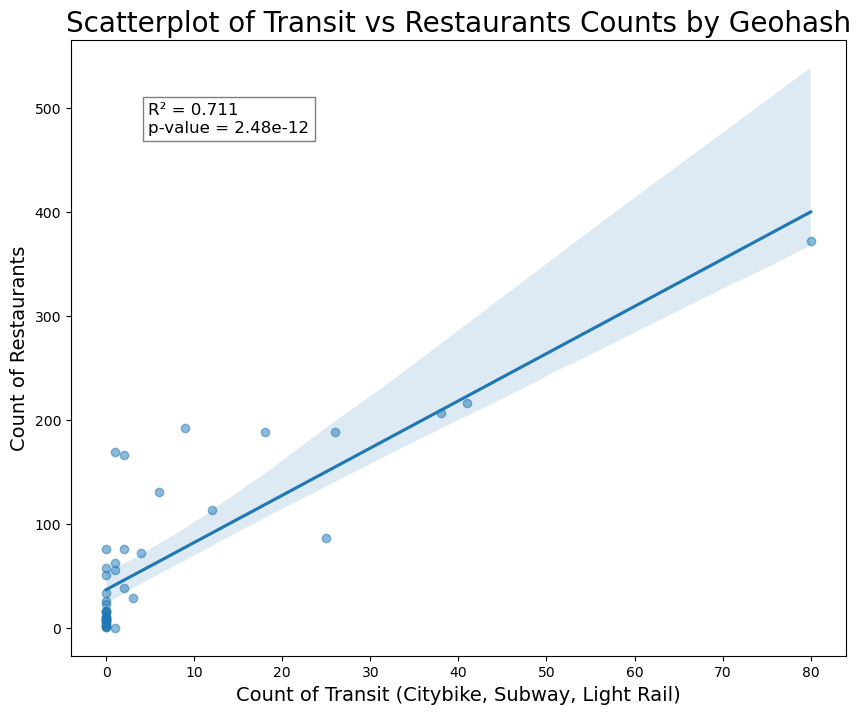

In [162]:
# Generate the scatterplot
plt.figure(figsize=(10, 8))
sns.regplot(x='Transit Count', y='Restaurants Count', data=plot_data_scatterplot_all_transit_r, scatter_kws={'alpha':0.5})

# Enhance the plot
plt.title('Scatterplot of Transit vs Restaurants Counts by Geohash', fontsize=20)
plt.xlabel('Count of Transit (Citybike, Subway, Light Rail)', fontsize=14)
plt.ylabel('Count of Restaurants', fontsize=14)

# Fit a linear regression model to get R-squared and p-value
X = plot_data_scatterplot_all_transit_r['Transit Count']
Y = plot_data_scatterplot_all_transit_r['Restaurants Count']
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()

# Get the R-squared and p-value
rsquared = model.rsquared
pvalue = model.f_pvalue

# Annotate the plot with the R-squared and p-value
plt.text(0.10, 0.85, f'R² = {rsquared:.3f}\np-value = {pvalue:.3g}', 
         fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.5),
         transform=plt.gca().transAxes)

plt.savefig('Scatterplot of Transit vs Restaurants Counts by Geohash_prec5.png', dpi=300)
plt.savefig('Scatterplot of Transit vs Restaurants Counts by Geohash_prec5.jpg', dpi=300)

# Show the plot
plt.show()

## Prepare Data For Rail And Establishments



In [33]:
# Count occurrences by Geohash
train_counts = geohash_df_no_bikes[geohash_df_no_bikes['Type'].isin(transit_types)].groupby('Geohash').size()
establishment_counts = geohash_df_no_bikes[geohash_df_no_bikes['Type'].isin(establishment_types)].groupby('Geohash').size()


In [34]:
# Merge the two Series into a DataFrame for plotting
plot_data_scatterplot_all_train_stations_b_r = pd.DataFrame({
    'Train Count': transit_counts,
    'Establishment Count': establishment_counts
}).fillna(0)  # Fill NaN with 0 where there is no count


In [35]:
plot_data_scatterplot_all_train_stations_b_r



,Train Count,Establishment Count
Geohash,,
f256x,0.0,6.0
f256y,0.0,1.0
f256z,0.0,1.0
f257n,0.0,1.0
f257p,0.0,1.0
f25d2,0.0,1.0
f25d4,0.0,1.0
f25d7,0.0,36.0
f25d8,0.0,10.0


In [36]:
bars_counts = geohash_df_no_bikes[geohash_df_no_bikes['Type'].isin(establishment_types_Bars)].groupby('Geohash').size()


In [37]:
# Merge the two Series into a DataFrame for plotting
plot_data_scatterplot_all_train_stations_b = pd.DataFrame({
    'Train Count': transit_counts,
    'Bar Count': bars_counts
}).fillna(0)  # Fill NaN with 0 where there is no count

In [38]:
plot_data_scatterplot_all_train_stations_b



,Train Count,Bar Count
Geohash,,
f256x,0.0,4.0
f256y,0.0,1.0
f256z,0.0,1.0
f257n,0.0,1.0
f257p,0.0,1.0
f25d2,0.0,1.0
f25d4,0.0,1.0
f25d7,0.0,3.0
f25d8,0.0,5.0


In [39]:
restaurant_counts = geohash_df_no_bikes[geohash_df_no_bikes['Type'].isin(establishment_types_Restaurants)].groupby('Geohash').size()


In [40]:
# Merge the two Series into a DataFrame for plotting
plot_data_scatterplot_all_train_stations_restaurants = pd.DataFrame({
    'Train Count': transit_counts,
    'Restaurants Count': restaurant_counts
}).fillna(0)  # Fill NaN with 0 where there is no count


In [47]:
plot_data_scatterplot_all_train_stations_restaurants


,Train Count,Restaurants Count
Geohash,,
f256x,0.0,2.0
f25d7,0.0,33.0
f25d8,0.0,5.0
f25d9,2.0,38.0
f25db,1.0,56.0
f25dd,0.0,23.0
f25de,0.0,26.0
f25df,1.0,62.0
f25dg,6.0,131.0


## Making Scatterplots For Rail And Establishments

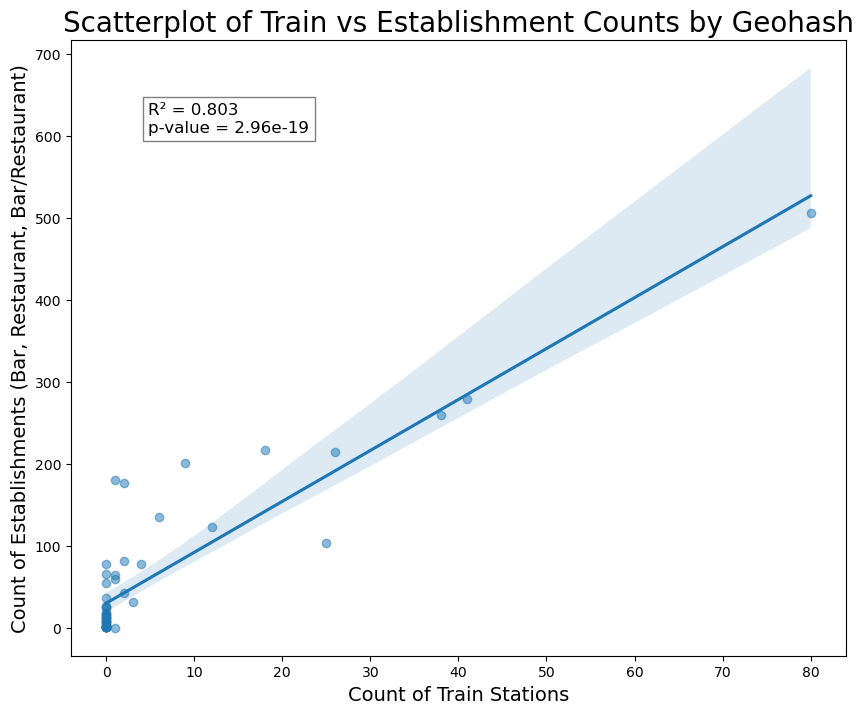

In [166]:
# Generate the scatterplot
plt.figure(figsize=(10, 8))
sns.regplot(x='Train Count', y='Establishment Count', data=plot_data_scatterplot_all_train_stations_b_r, scatter_kws={'alpha':0.5})

# Enhance the plot
plt.title('Scatterplot of Train vs Establishment Counts by Geohash', fontsize=20)
plt.xlabel('Count of Train Stations', fontsize=14)
plt.ylabel('Count of Establishments (Bar, Restaurant, Bar/Restaurant)', fontsize=14)

# Fit a linear regression model to get R-squared and p-value
X = plot_data_scatterplot_all_train_stations_b_r['Train Count']
Y = plot_data_scatterplot_all_train_stations_b_r['Establishment Count']
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()

# Get the R-squared and p-value
rsquared = model.rsquared
pvalue = model.f_pvalue

# Annotate the plot with the R-squared and p-value
plt.text(0.10, 0.85, f'R² = {rsquared:.3f}\np-value = {pvalue:.3g}', 
         fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.5),
         transform=plt.gca().transAxes)

plt.savefig('Scatterplot of Train Stations vs Establishment Counts by Geohash_prec5.png', dpi=300)
plt.savefig('Scatterplot of Train Stations vs Establishment Counts by Geohash_prec5.jpg', dpi=300)

# Show the plot
plt.show()



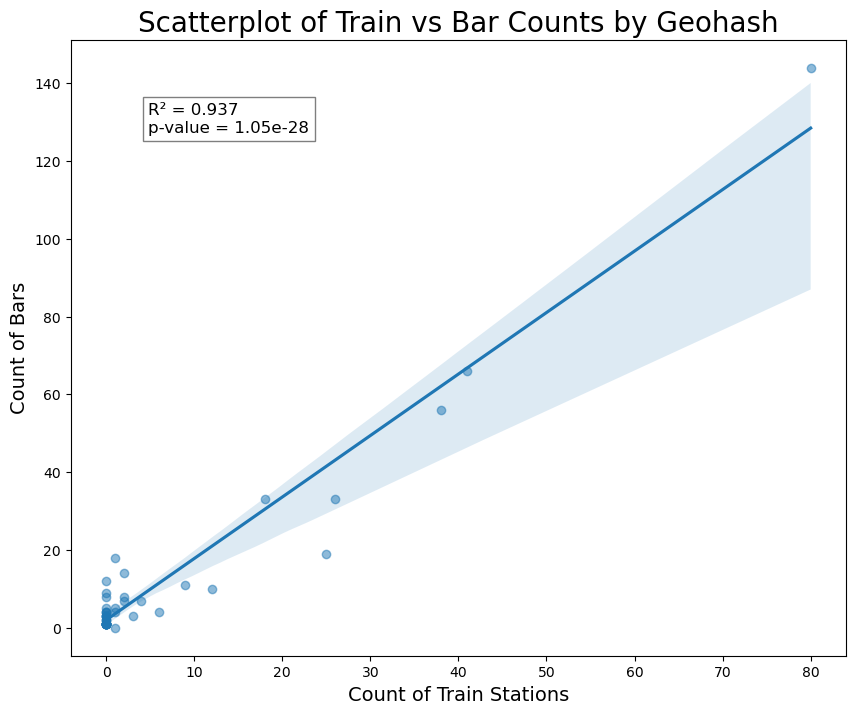

In [165]:
# Generate the scatterplot
plt.figure(figsize=(10, 8))
sns.regplot(x='Train Count', y='Bar Count', data=plot_data_scatterplot_all_train_stations_b, scatter_kws={'alpha':0.5})

# Enhance the plot
plt.title('Scatterplot of Train vs Bar Counts by Geohash', fontsize=20)
plt.xlabel('Count of Train Stations', fontsize=14)
plt.ylabel('Count of Bars', fontsize=14)

# Fit a linear regression model to get R-squared and p-value
X = plot_data_scatterplot_all_train_stations_b['Train Count']
Y = plot_data_scatterplot_all_train_stations_b['Bar Count']
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()

# Get the R-squared and p-value
rsquared = model.rsquared
pvalue = model.f_pvalue

# Annotate the plot with the R-squared and p-value
plt.text(0.10, 0.85, f'R² = {rsquared:.3f}\np-value = {pvalue:.3g}', 
         fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.5),
         transform=plt.gca().transAxes)

plt.savefig('Scatterplot of Train Stations vs Bar Counts by Geohash_prec5.png', dpi=300)
plt.savefig('Scatterplot of Train Stations vs Bar Counts by Geohash_prec5.jpg', dpi=300)

# Show the plot
plt.show()




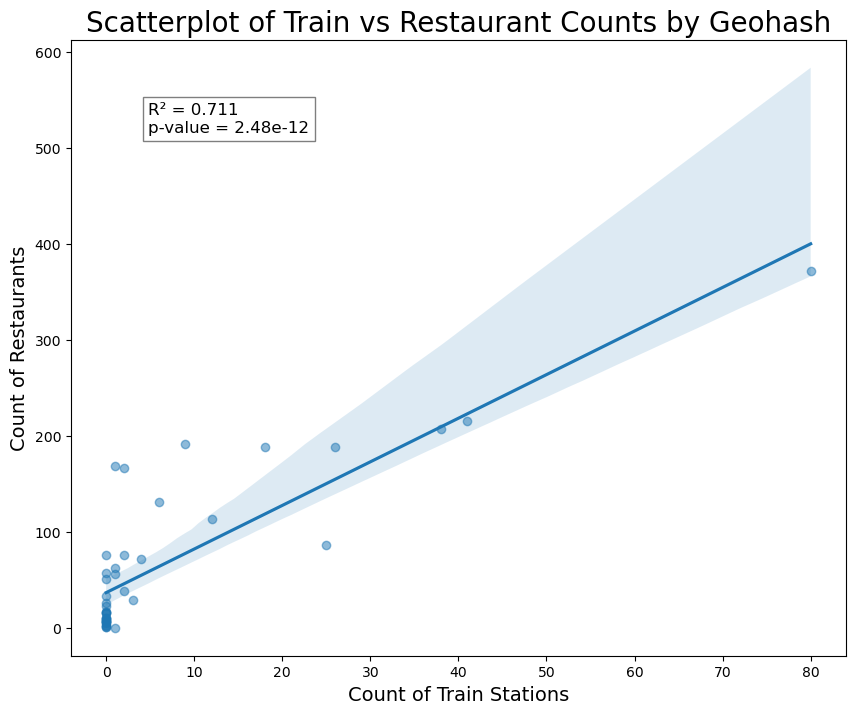

In [169]:
# Generate the scatterplot
plt.figure(figsize=(10, 8))
sns.regplot(x='Train Count', y='Restaurants Count', data=plot_data_scatterplot_all_train_stations_restaurants, scatter_kws={'alpha':0.5})

# Enhance the plot
plt.title('Scatterplot of Train vs Restaurant Counts by Geohash', fontsize=20)
plt.xlabel('Count of Train Stations', fontsize=14)
plt.ylabel('Count of Restaurants', fontsize=14)

# Fit a linear regression model to get R-squared and p-value
X = plot_data_scatterplot_all_train_stations_restaurants['Train Count']
Y = plot_data_scatterplot_all_train_stations_restaurants['Restaurants Count']
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()

# Get the R-squared and p-value
rsquared = model.rsquared
pvalue = model.f_pvalue

# Annotate the plot with the R-squared and p-value
plt.text(0.10, 0.85, f'R² = {rsquared:.3f}\np-value = {pvalue:.3g}', 
         fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.5),
         transform=plt.gca().transAxes)

plt.savefig('Scatterplot of Train Stations vs Restaurant Counts by Geohash_prec5.png', dpi=300)
plt.savefig('Scatterplot of Train Stations vs Restaurant Counts by Geohash_prec5.jpg', dpi=300)

# Show the plot
plt.show()


## There are three geohashes with noticably more establishments and transit stations in all of these scatterplots. Let's see if they're the same one


In [21]:
data_scatterplot_all_transit_b_r_top_3 = plot_data_scatterplot_all_transit_b_r.sort_values(by='Establishment Count', ascending=False).head(3)


In [22]:
data_scatterplot_all_transit_b_r_top_3

,Transit Count,Establishment Count
Geohash,,
f25dv,80.0,506.0
f25dy,41.0,279.0
f25ej,38.0,260.0


In [24]:
data_scatterplot_all_transit_b_top_3 = plot_data_scatterplot_all_transit_b.sort_values(by='Bar Count', ascending=False).head(3)

In [25]:
data_scatterplot_all_transit_b_top_3

,Transit Count,Bar Count
Geohash,,
f25dv,80.0,144.0
f25dy,41.0,66.0
f25ej,38.0,56.0


In [28]:
data_scatterplot_all_transit_r_top_3 = plot_data_scatterplot_all_transit_r.sort_values(by='Restaurants Count', ascending=False).head(3)

In [29]:
data_scatterplot_all_transit_r_top_3

,Transit Count,Restaurants Count
Geohash,,
f25dv,80.0,372.0
f25dy,41.0,216.0
f25ej,38.0,207.0


In [42]:
plot_data_scatterplot_all_train_stations_b_r_top_3 = plot_data_scatterplot_all_train_stations_b_r.sort_values(by='Establishment Count', ascending=False).head(3)

In [43]:
plot_data_scatterplot_all_train_stations_b_r_top_3

,Train Count,Establishment Count
Geohash,,
f25dv,80.0,506.0
f25dy,41.0,279.0
f25ej,38.0,260.0


In [45]:
plot_data_scatterplot_all_train_stations_b_top_3 = plot_data_scatterplot_all_train_stations_b.sort_values(by='Bar Count', ascending=False).head(3)

In [46]:
plot_data_scatterplot_all_train_stations_b_top_3

,Train Count,Bar Count
Geohash,,
f25dv,80.0,144.0
f25dy,41.0,66.0
f25ej,38.0,56.0


In [50]:
plot_data_scatterplot_all_train_stations_restaurant_top_3 = plot_data_scatterplot_all_train_stations_restaurants.sort_values(by='Restaurants Count', ascending=False).head(3)

In [51]:
plot_data_scatterplot_all_train_stations_restaurant_top_3

,Train Count,Restaurants Count
Geohash,,
f25dv,80.0,372.0
f25dy,41.0,216.0
f25ej,38.0,207.0


## They're the same. 

## I checked on www.movable-type.co.uk. All three of these Geohashes are around the center of Montreal. So it makes sense that they would have the most bars and restaurants.

## Let's split these three geocodes into more precise geocodes and create the same scatterplots within them.

In [52]:
import geohash


In [53]:
original_geocodes = ["f25dv", "f25dy", "f25ej"]


In [55]:
# splitting geocodes
def split_geocodes(geocodes, level=1):
    split_codes = {}
    for code in geocodes:
        detailed_geocodes = []
        # Decode to get the central point of the geocode area
        lat, lon = geohash.decode_exactly(code)[:2]
        # Encode to a more precise geocode
        for i in range(32):  # Generating 32 sub-geocodes for demonstration
            detailed_geocodes.append(geohash.encode(lat, lon, len(code) + level))
        split_codes[code] = detailed_geocodes
    return split_codes

In [56]:
split_geocodes = split_geocodes(original_geocodes, level=1)


In [57]:
split_geocodes

{'f25dv': ['f25dvs',
  'f25dvs',
  'f25dvs',
  'f25dvs',
  'f25dvs',
  'f25dvs',
  'f25dvs',
  'f25dvs',
  'f25dvs',
  'f25dvs',
  'f25dvs',
  'f25dvs',
  'f25dvs',
  'f25dvs',
  'f25dvs',
  'f25dvs',
  'f25dvs',
  'f25dvs',
  'f25dvs',
  'f25dvs',
  'f25dvs',
  'f25dvs',
  'f25dvs',
  'f25dvs',
  'f25dvs',
  'f25dvs',
  'f25dvs',
  'f25dvs',
  'f25dvs',
  'f25dvs',
  'f25dvs',
  'f25dvs'],
 'f25dy': ['f25dys',
  'f25dys',
  'f25dys',
  'f25dys',
  'f25dys',
  'f25dys',
  'f25dys',
  'f25dys',
  'f25dys',
  'f25dys',
  'f25dys',
  'f25dys',
  'f25dys',
  'f25dys',
  'f25dys',
  'f25dys',
  'f25dys',
  'f25dys',
  'f25dys',
  'f25dys',
  'f25dys',
  'f25dys',
  'f25dys',
  'f25dys',
  'f25dys',
  'f25dys',
  'f25dys',
  'f25dys',
  'f25dys',
  'f25dys',
  'f25dys',
  'f25dys'],
 'f25ej': ['f25ejs',
  'f25ejs',
  'f25ejs',
  'f25ejs',
  'f25ejs',
  'f25ejs',
  'f25ejs',
  'f25ejs',
  'f25ejs',
  'f25ejs',
  'f25ejs',
  'f25ejs',
  'f25ejs',
  'f25ejs',
  'f25ejs',
  'f25ejs',
  'f25ejs',

## Putting These In The Data Frames In The Joining Data Notebook

In [60]:
geohash_6_df = pd.read_csv('geohash_6_df.csv')


In [61]:
geohash_6_no_bikes_df= pd.read_csv('geohash_6_no_bikes_df.csv')


In [62]:
geohash_6_df

,Geohash,Geohash_prec6,Type,Address,Name
0,f25dy,f25dyh,Citybike,NaN,Métro Champ-de-Mars (Viger / Sanguinet)
1,f25dv,f25dvu,Citybike,NaN,Clark / Ontario
2,f25dy,f25dym,Citybike,NaN,de la Porte de Québec / St-André
3,f25dy,f25dyj,Citybike,NaN,St-Denis / de Maisonneuve
4,f25dv,f25dvy,Citybike,NaN,Métro Sherbrooke (de Rigaud / Berri)
...,...,...,...,...,...
1199,f25dv,f25dvp,Bar/Restaurant,"5834 Park Ave, Montréal, Quebec H2V 4H3",Mezcaleros Tapas & Cocktails
1200,f25ej,f25eju,Bar/Restaurant,"3560 Rue Masson, Montréal, QC H1X 1R9",Café Bar U-Turn
1201,f25ej,f25ejg,Bar/Restaurant,"2800 Rue Masson, Montréal, QC H1Y 1W7",Quai No.4
1202,f25dv,f25dvx,Bar/Restaurant,"500 Rue Rachel E, Montréal, QC H2J 2H2",Name's on the way


In [63]:
geohash_6_no_bikes_df

,Geohash,Geohash_prec6,Type,Address,Name
0,f25dy,f25dyh,Citybike,NaN,Métro Champ-de-Mars (Viger / Sanguinet)
1,f25dv,f25dvu,Citybike,NaN,Clark / Ontario
2,f25dy,f25dym,Citybike,NaN,de la Porte de Québec / St-André
3,f25dy,f25dyj,Citybike,NaN,St-Denis / de Maisonneuve
4,f25dv,f25dvy,Citybike,NaN,Métro Sherbrooke (de Rigaud / Berri)
...,...,...,...,...,...
1199,f25dv,f25dvp,Bar/Restaurant,"5834 Park Ave, Montréal, Quebec H2V 4H3",Mezcaleros Tapas & Cocktails
1200,f25ej,f25eju,Bar/Restaurant,"3560 Rue Masson, Montréal, QC H1X 1R9",Café Bar U-Turn
1201,f25ej,f25ejg,Bar/Restaurant,"2800 Rue Masson, Montréal, QC H1Y 1W7",Quai No.4
1202,f25dv,f25dvx,Bar/Restaurant,"500 Rue Rachel E, Montréal, QC H2J 2H2",Name's on the way


In [102]:
geohash_6_df['Geohash_prec6']

0       f25dyh
1       f25dvu
2       f25dym
3       f25dyj
4       f25dvy
         ...  
1199    f25dvp
1200    f25eju
1201    f25ejg
1202    f25dvx
1203    f25dy5
Name: Geohash_prec6, Length: 1204, dtype: object

In [105]:
geohash_6_no_bikes_df

,Geohash,Geohash_prec6,Type,Address,Name
0,f25dy,f25dyh,Citybike,NaN,Métro Champ-de-Mars (Viger / Sanguinet)
1,f25dv,f25dvu,Citybike,NaN,Clark / Ontario
2,f25dy,f25dym,Citybike,NaN,de la Porte de Québec / St-André
3,f25dy,f25dyj,Citybike,NaN,St-Denis / de Maisonneuve
4,f25dv,f25dvy,Citybike,NaN,Métro Sherbrooke (de Rigaud / Berri)
...,...,...,...,...,...
1199,f25dv,f25dvp,Bar/Restaurant,"5834 Park Ave, Montréal, Quebec H2V 4H3",Mezcaleros Tapas & Cocktails
1200,f25ej,f25eju,Bar/Restaurant,"3560 Rue Masson, Montréal, QC H1X 1R9",Café Bar U-Turn
1201,f25ej,f25ejg,Bar/Restaurant,"2800 Rue Masson, Montréal, QC H1Y 1W7",Quai No.4
1202,f25dv,f25dvx,Bar/Restaurant,"500 Rue Rachel E, Montréal, QC H2J 2H2",Name's on the way


## Preparing Dataframes For Scatterplots Precision 6

In [ ]:


# Count occurrences by Geohash
transit_counts_6 = geohash_6_df[geohash_6_df['Type'].isin(transit_types)].groupby('Geohash_prec6').size()
establishment_counts_6 = geohash_6_df[geohash_6_df['Type'].isin(establishment_types)].groupby('Geohash_prec6').size()
bars_counts_6 = geohash_6_df[geohash_6_df['Type'].isin(establishment_types_Bars)].groupby('Geohash_prec6').size()
restaurant_counts_6 = geohash_6_df[geohash_6_df['Type'].isin(establishment_types_Restaurants)].groupby('Geohash_prec6').size()
train_counts = geohash_6_no_bikes_df[geohash_6_no_bikes_df['Type'].isin(transit_types)].groupby('Geohash_prec6').size()

In [74]:
# Merge the two Series into a DataFrame for plotting
plot_data_scatterplot_all_transit_b_r_6 = pd.DataFrame({
    'Transit Count': transit_counts_6,
    'Establishment Count': establishment_counts_6
}).fillna(0)  # Fill NaN with 0 where there is no count

In [75]:
plot_data_scatterplot_all_transit_b_r_6

,Transit Count,Establishment Count
Geohash_prec6,,
f25dv2,0.0,10.0
f25dv3,1.0,1.0
f25dv8,1.0,10.0
f25dv9,5.0,33.0
f25dvb,4.0,12.0
...,...,...
f25ejv,0.0,4.0
f25ejw,0.0,3.0
f25ejx,0.0,5.0


In [86]:
# Merge the two Series into a DataFrame for plotting
plot_data_scatterplot_all_transit_b_6 = pd.DataFrame({
    'Transit Count': transit_counts_6,
    'Bars Count': bars_counts_6
}).fillna(0)  # Fill NaN with 0 where there is no count

In [87]:
plot_data_scatterplot_all_transit_b_6

,Transit Count,Bars Count
Geohash_prec6,,
f25dv3,1.0,0.0
f25dv8,1.0,1.0
f25dv9,5.0,5.0
f25dvb,4.0,5.0
f25dvc,3.0,2.0
f25dvd,3.0,26.0
f25dve,1.0,3.0
f25dvf,11.0,10.0
f25dvg,17.0,9.0


In [89]:
# Merge the two Series into a DataFrame for plotting
plot_data_scatterplot_all_transit_r_6 = pd.DataFrame({
    'Transit Count': transit_counts_6,
    'Restaurant Count': restaurant_counts_6
}).fillna(0)  # Fill NaN with 0 where there is no count

In [90]:
plot_data_scatterplot_all_transit_r_6

,Transit Count,Restaurant Count
Geohash_prec6,,
f25dv2,0.0,10.0
f25dv3,1.0,1.0
f25dv8,1.0,9.0
f25dv9,5.0,29.0
f25dvb,4.0,8.0
...,...,...
f25ejv,0.0,3.0
f25ejw,0.0,3.0
f25ejx,0.0,5.0


In [144]:
plot_data_scatterplot_all_transit_r_6['Restaurant Count']

Geohash_prec6
f25dv2    10.0
f25dv3     1.0
f25dv8     9.0
f25dv9    29.0
f25dvb     8.0
          ... 
f25ejv     3.0
f25ejw     3.0
f25ejx     5.0
f25ejy     1.0
f25ejz     3.0
Name: Restaurant Count, Length: 73, dtype: float64

In [118]:
# Merge the two Series into a DataFrame for plotting
plot_data_scatterplot_all_train_b_r_6 = pd.DataFrame({
    'Trains Count': train_counts,
    'Establishment Count': establishment_counts_6
}).fillna(0)  # Fill NaN with 0 where there is no count



In [119]:
plot_data_scatterplot_all_train_b_r_6


,Trains Count,Establishment Count
Geohash_prec6,,
f25dv2,0.0,10.0
f25dv3,1.0,1.0
f25dv8,1.0,10.0
f25dv9,5.0,33.0
f25dvb,4.0,12.0
...,...,...
f25ejv,0.0,4.0
f25ejw,0.0,3.0
f25ejx,0.0,5.0


In [120]:
# Merge the two Series into a DataFrame for plotting
plot_data_scatterplot_all_train_b_6 = pd.DataFrame({
    'Trains Count': train_counts,
    'Bars Count': bars_counts_6
}).fillna(0)  # Fill NaN with 0 where there is no count


In [121]:
plot_data_scatterplot_all_train_b_6

,Trains Count,Bars Count
Geohash_prec6,,
f25dv3,1.0,0.0
f25dv8,1.0,1.0
f25dv9,5.0,5.0
f25dvb,4.0,5.0
f25dvc,3.0,2.0
f25dvd,3.0,26.0
f25dve,1.0,3.0
f25dvf,11.0,10.0
f25dvg,17.0,9.0


In [116]:
# Merge the two Series into a DataFrame for plotting
plot_data_scatterplot_all_train_r_6 = pd.DataFrame({
    'Trains Count': train_counts,
    'Restaurant Count': restaurant_counts_6
}).fillna(0)  # Fill NaN with 0 where there is no count

In [117]:
plot_data_scatterplot_all_train_r_6

,Trains Count,Restaurant Count
Geohash_prec6,,
f25dv2,0.0,10.0
f25dv3,1.0,1.0
f25dv8,1.0,9.0
f25dv9,5.0,29.0
f25dvb,4.0,8.0
...,...,...
f25ejv,0.0,3.0
f25ejw,0.0,3.0
f25ejx,0.0,5.0


## Making Scatterplots For GeoHash Precision 6

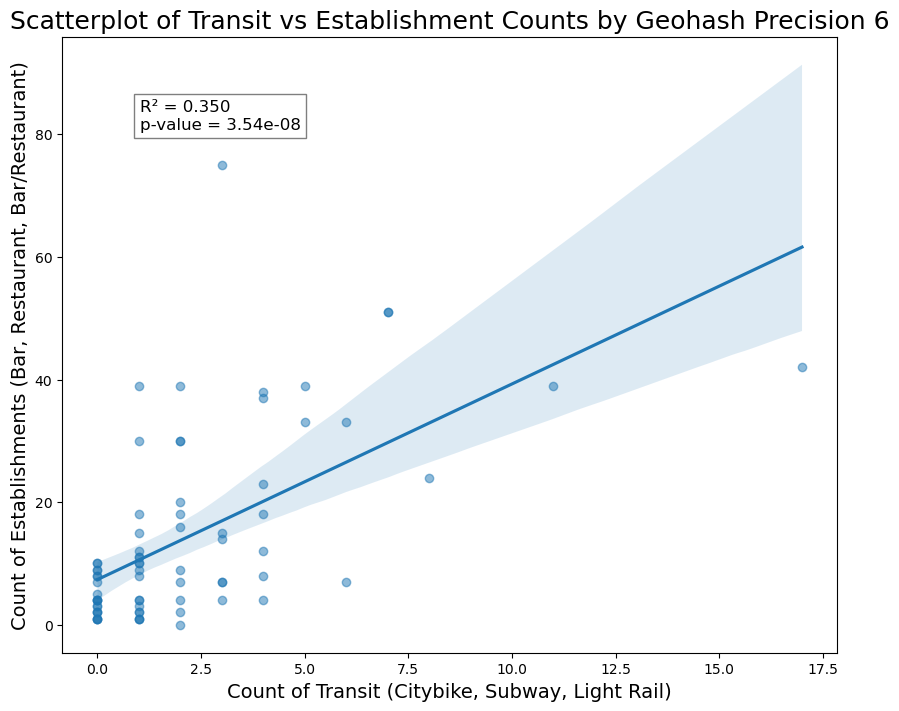

In [154]:
# Generate the scatterplot
plt.figure(figsize=(10, 8))
sns.regplot(x='Transit Count', y='Establishment Count', data=plot_data_scatterplot_all_transit_b_r_6, scatter_kws={'alpha':0.5})

# Enhance the plot
plt.title('Scatterplot of Transit vs Establishment Counts by Geohash Precision 6', fontsize=18)
plt.xlabel('Count of Transit (Citybike, Subway, Light Rail)', fontsize=14)
plt.ylabel('Count of Establishments (Bar, Restaurant, Bar/Restaurant)', fontsize=14)

# Fit a linear regression model to get R-squared and p-value
X = plot_data_scatterplot_all_transit_b_r_6['Transit Count']
Y = plot_data_scatterplot_all_transit_b_r_6['Establishment Count']
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()

# Get the R-squared and p-value
rsquared = model.rsquared
pvalue = model.f_pvalue

# Annotate the plot with the R-squared and p-value
plt.text(0.10, 0.85, f'R² = {rsquared:.3f}\np-value = {pvalue:.3g}', 
         fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.5),
         transform=plt.gca().transAxes)

plt.savefig('Scatterplot of Transit vs Establishment Counts by Geohash_prec6.png', dpi=300)
plt.savefig('Scatterplot of Transit vs Establishment Counts by Geohash_prec6.jpg', dpi=300)

# Show the plot
plt.show()

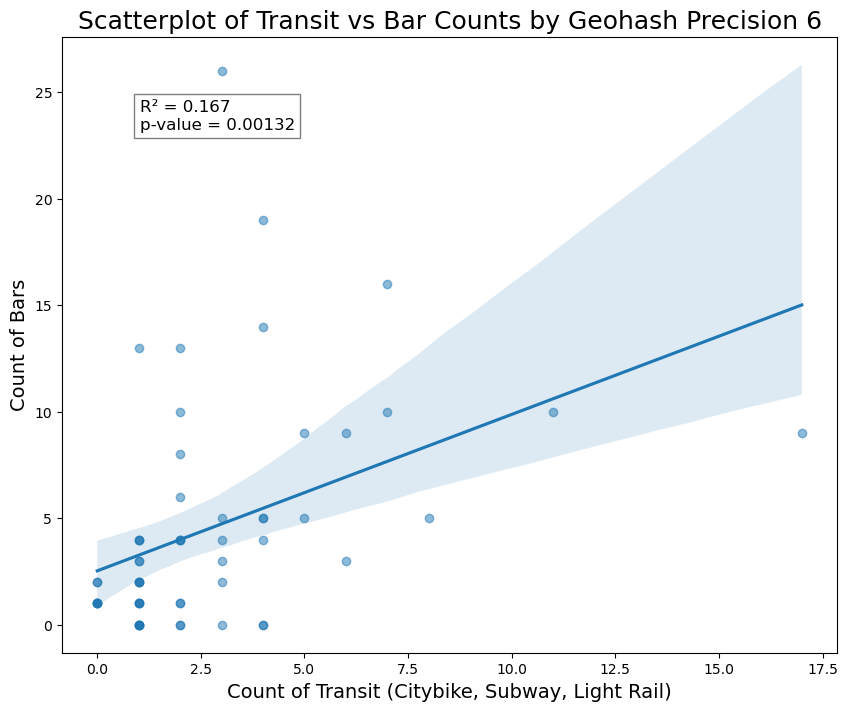

In [155]:
# Generate the scatterplot
plt.figure(figsize=(10, 8))
sns.regplot(x='Transit Count', y='Bars Count', data=plot_data_scatterplot_all_transit_b_6, scatter_kws={'alpha':0.5})

# Enhance the plot
plt.title('Scatterplot of Transit vs Bar Counts by Geohash Precision 6', fontsize=18)
plt.xlabel('Count of Transit (Citybike, Subway, Light Rail)', fontsize=14)
plt.ylabel('Count of Bars', fontsize=14)

# Fit a linear regression model to get R-squared and p-value
X = plot_data_scatterplot_all_transit_b_6['Transit Count']
Y = plot_data_scatterplot_all_transit_b_6['Bars Count']
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()

# Get the R-squared and p-value
rsquared = model.rsquared
pvalue = model.f_pvalue

# Annotate the plot with the R-squared and p-value
plt.text(0.10, 0.85, f'R² = {rsquared:.3f}\np-value = {pvalue:.3g}', 
         fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.5),
         transform=plt.gca().transAxes)

plt.savefig('Scatterplot of Transit vs Bar Counts by Geohash_prec6.png', dpi=300)
plt.savefig('Scatterplot of Transit vs Bar Counts by Geohash_prec6.jpg', dpi=300)

# Show the plot
plt.show()

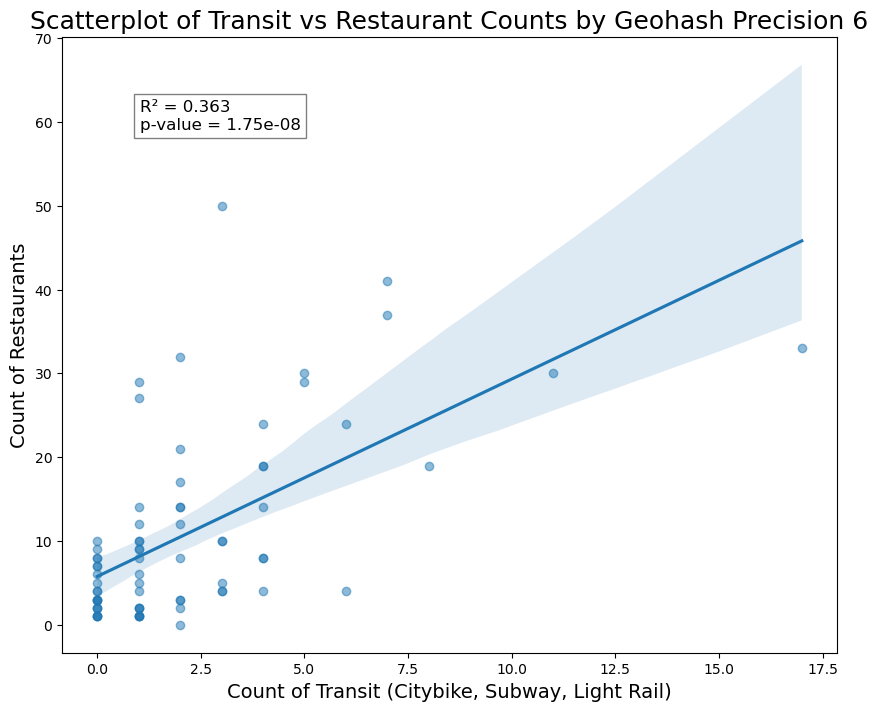

In [156]:
# Generate the scatterplot
plt.figure(figsize=(10, 8))
sns.regplot(x='Transit Count', y='Restaurant Count', data=plot_data_scatterplot_all_transit_r_6, scatter_kws={'alpha':0.5})

# Enhance the plot
plt.title('Scatterplot of Transit vs Restaurant Counts by Geohash Precision 6', fontsize=18)
plt.xlabel('Count of Transit (Citybike, Subway, Light Rail)', fontsize=14)
plt.ylabel('Count of Restaurants', fontsize=14)

# Fit a linear regression model to get R-squared and p-value
X = plot_data_scatterplot_all_transit_r_6['Transit Count']
Y = plot_data_scatterplot_all_transit_r_6['Restaurant Count']
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()

# Get the R-squared and p-value
rsquared = model.rsquared
pvalue = model.f_pvalue

# Annotate the plot with the R-squared and p-value
plt.text(0.10, 0.85, f'R² = {rsquared:.3f}\np-value = {pvalue:.3g}', 
         fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.5),
         transform=plt.gca().transAxes)

plt.savefig('Scatterplot of Transit vs Restaurant Counts by Geohash_prec6.png', dpi=300)
plt.savefig('Scatterplot of Transit vs Restaurant Counts by Geohash_prec6.jpg', dpi=300)

# Show the plot
plt.show()

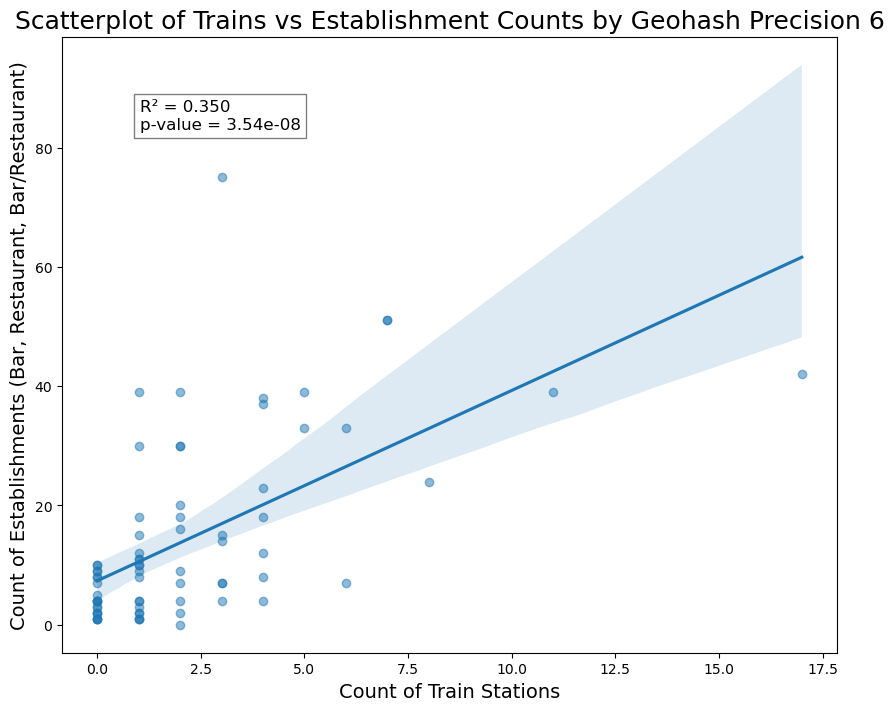

In [157]:
# Generate the scatterplot
plt.figure(figsize=(10, 8))
sns.regplot(x='Trains Count', y='Establishment Count', data=plot_data_scatterplot_all_train_b_r_6, scatter_kws={'alpha':0.5})

# Enhance the plot
plt.title('Scatterplot of Trains vs Establishment Counts by Geohash Precision 6', fontsize=18)
plt.xlabel('Count of Train Stations', fontsize=14)
plt.ylabel('Count of Establishments (Bar, Restaurant, Bar/Restaurant)', fontsize=14)

# Fit a linear regression model to get R-squared and p-value
X = plot_data_scatterplot_all_train_b_r_6['Trains Count']
Y = plot_data_scatterplot_all_train_b_r_6['Establishment Count']
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()

# Get the R-squared and p-value
rsquared = model.rsquared
pvalue = model.f_pvalue

# Annotate the plot with the R-squared and p-value
plt.text(0.10, 0.85, f'R² = {rsquared:.3f}\np-value = {pvalue:.3g}', 
         fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.5),
         transform=plt.gca().transAxes)

plt.savefig('Scatterplot of Trains vs Establishment Counts by Geohash_prec6.png', dpi=300)
plt.savefig('Scatterplot of Trains vs Establishment Counts by Geohash_prec6.jpg', dpi=300)

# Show the plot
plt.show()

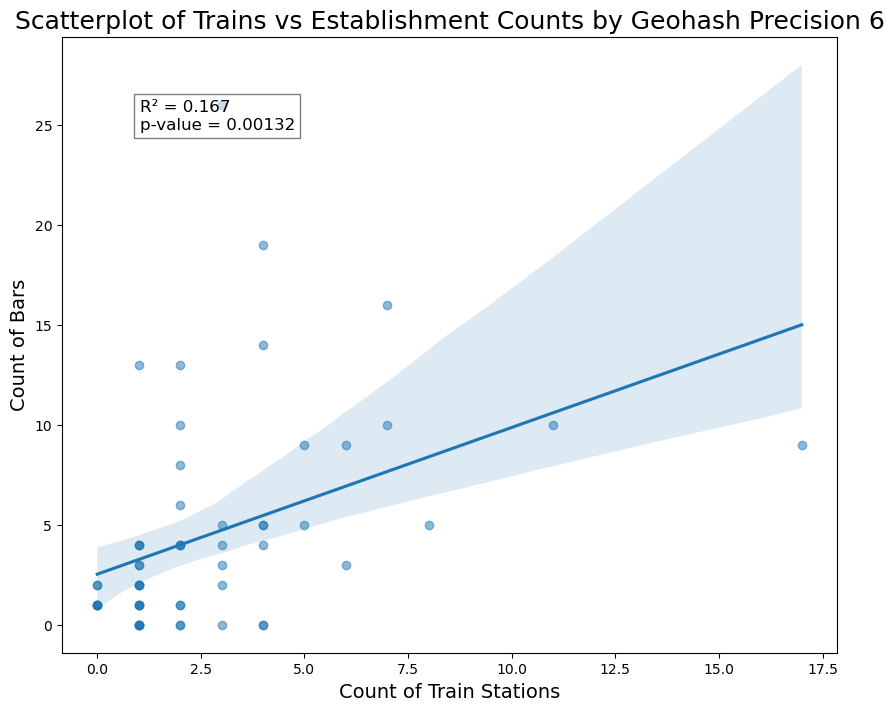

In [158]:
# Generate the scatterplot
plt.figure(figsize=(10, 8))
sns.regplot(x='Trains Count', y='Bars Count', data=plot_data_scatterplot_all_train_b_6, scatter_kws={'alpha':0.5})

# Enhance the plot
plt.title('Scatterplot of Trains vs Establishment Counts by Geohash Precision 6', fontsize=18)
plt.xlabel('Count of Train Stations', fontsize=14)
plt.ylabel('Count of Bars', fontsize=14)

# Fit a linear regression model to get R-squared and p-value
X = plot_data_scatterplot_all_train_b_6['Trains Count']
Y = plot_data_scatterplot_all_train_b_6['Bars Count']
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()

# Get the R-squared and p-value
rsquared = model.rsquared
pvalue = model.f_pvalue

# Annotate the plot with the R-squared and p-value
plt.text(0.10, 0.85, f'R² = {rsquared:.3f}\np-value = {pvalue:.3g}', 
         fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.5),
         transform=plt.gca().transAxes)

plt.savefig('Scatterplot of Trains vs Bar Counts by Geohash_prec6.png', dpi=300)
plt.savefig('Scatterplot of Trains vs Bar Counts by Geohash_prec6.jpg', dpi=300)

# Show the plot
plt.show()

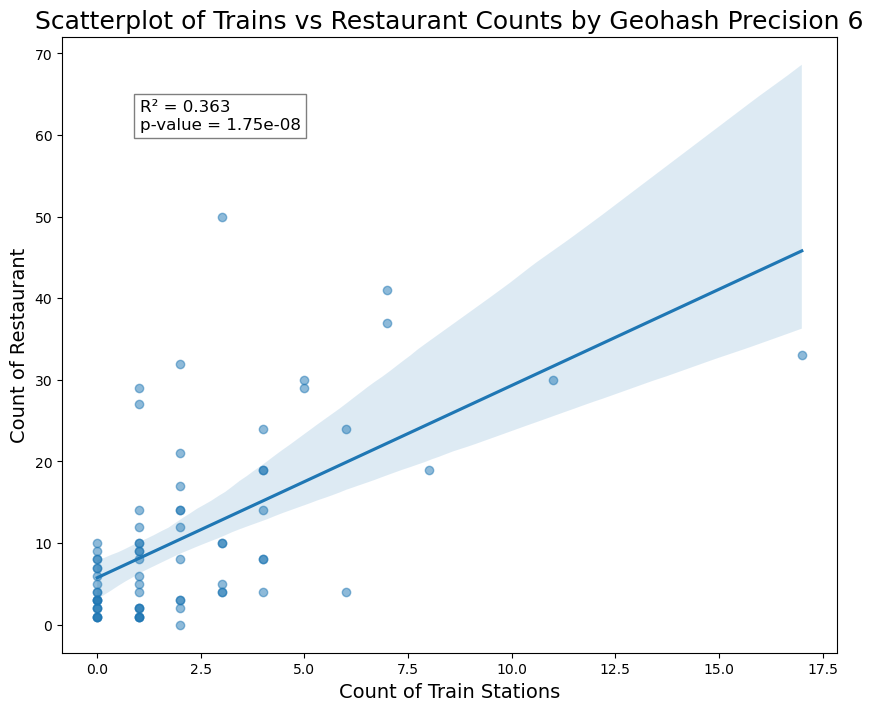

In [159]:
# Generate the scatterplot
plt.figure(figsize=(10, 8))
sns.regplot(x='Trains Count', y='Restaurant Count', data=plot_data_scatterplot_all_train_r_6, scatter_kws={'alpha':0.5})

# Enhance the plot
plt.title('Scatterplot of Trains vs Restaurant Counts by Geohash Precision 6', fontsize=18)
plt.xlabel('Count of Train Stations', fontsize=14)
plt.ylabel('Count of Restaurant', fontsize=14)

# Fit a linear regression model to get R-squared and p-value
X = plot_data_scatterplot_all_train_r_6['Trains Count']
Y = plot_data_scatterplot_all_train_r_6['Restaurant Count']
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()

# Get the R-squared and p-value
rsquared = model.rsquared
pvalue = model.f_pvalue

# Annotate the plot with the R-squared and p-value
plt.text(0.10, 0.85, f'R² = {rsquared:.3f}\np-value = {pvalue:.3g}', 
         fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.5),
         transform=plt.gca().transAxes)

plt.savefig('Scatterplot of Trains vs Restaurant Counts by Geohash_prec6.png', dpi=300)
plt.savefig('Scatterplot of Trains vs Restaurant Counts by Geohash_prec6.jpg', dpi=300)

# Show the plot
plt.show()